# ECE285 Assignment 1: Neural Network in NumPy

Use this notebook to build your neural network by implementing the following functions in the python files under `ece285/algorithms` directory:

1. `linear.py`
2. `relu.py`
3. `softmax.py`
4. `loss_func.py`

You will be testing your 2 layer neural network implementation on a toy dataset.

TO SUBMIT: PDF of this notebook with all the required outputs and answers.

In [13]:
# Setup
import matplotlib.pyplot as plt
import numpy as np

from ece285.layers.sequential import Sequential
from ece285.layers.linear import Linear
from ece285.layers.relu import ReLU
from ece285.layers.softmax import Softmax
from ece285.layers.loss_func import CrossEntropyLoss
from ece285.utils.optimizer import SGD

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class Sequential as implemented in the file assignment2/layers/sequential.py to build a layer by layer model of our neural network. Below we initialize the toy model and the toy random data that you will use to develop your implementation.

In [14]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3  # Output
num_inputs = 10  # N


def init_toy_model(): 
    np.random.seed(0)
    l1 = Linear(input_size, hidden_size) # Linear layer
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])


def init_toy_data():
    np.random.seed(0)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.random.randint(num_classes, size=num_inputs)
    # y = np.array([0, 1, 2, 2, 1])
    return X, y


net = init_toy_model()
X, y = init_toy_data()


### Forward Pass: Compute Scores (20%)
Implement the forward functions in Linear, Relu and Softmax layers and get the output by passing our toy data X
The output must match the given output scores

In [15]:
scores = net.forward(X)
print("Your scores:")
print(scores)
print()
print("correct scores:")
correct_scores = np.asarray(
    [
        [0.33333514, 0.33333826, 0.33332661],
        [0.3333351, 0.33333828, 0.33332661],
        [0.3333351, 0.33333828, 0.33332662],
        [0.3333351, 0.33333828, 0.33332662],
        [0.33333509, 0.33333829, 0.33332662],
        [0.33333508, 0.33333829, 0.33332662],
        [0.33333511, 0.33333828, 0.33332661],
        [0.33333512, 0.33333827, 0.33332661],
        [0.33333508, 0.33333829, 0.33332662],
        [0.33333511, 0.33333828, 0.33332662],
    ]
)
print(correct_scores)

# The difference should be very small. We get < 1e-7
print("Difference between your scores and correct scores:")
print(np.sum(np.abs(scores - correct_scores)))


Your scores:
[[0.33333514 0.33333826 0.33332661]
 [0.3333351  0.33333828 0.33332661]
 [0.3333351  0.33333828 0.33332662]
 [0.3333351  0.33333828 0.33332662]
 [0.33333509 0.33333829 0.33332662]
 [0.33333508 0.33333829 0.33332662]
 [0.33333511 0.33333828 0.33332661]
 [0.33333512 0.33333827 0.33332661]
 [0.33333508 0.33333829 0.33332662]
 [0.33333511 0.33333828 0.33332662]]

correct scores:
[[0.33333514 0.33333826 0.33332661]
 [0.3333351  0.33333828 0.33332661]
 [0.3333351  0.33333828 0.33332662]
 [0.3333351  0.33333828 0.33332662]
 [0.33333509 0.33333829 0.33332662]
 [0.33333508 0.33333829 0.33332662]
 [0.33333511 0.33333828 0.33332661]
 [0.33333512 0.33333827 0.33332661]
 [0.33333508 0.33333829 0.33332662]
 [0.33333511 0.33333828 0.33332662]]
Difference between your scores and correct scores:
8.799388495628335e-08


### Forward Pass: Compute loss given the output scores from the previous step (10%)
Implement the forward function in the loss_func.py file, and output the loss value. The loss value must match the given loss value.

In [16]:
Loss = CrossEntropyLoss()
loss = Loss.forward(scores, y)
correct_loss = 1.098612723362578
print(loss)
# should be very small, we get < 1e-12
print("Difference between your loss and correct loss:")
print(np.sum(np.abs(loss - correct_loss)))


1.098612723362578
Difference between your loss and correct loss:
0.0


### Backward Pass (40%)
Implement the rest of the functions in the given files. Specifically, implement the backward function in all the 4 files as mentioned in the files. Note: No backward function in the softmax file, the gradient for softmax is jointly calculated with the cross entropy loss in the loss_func.backward function.

You will use the chain rule to calculate gradient individually for each layer. You can assume that this calculated gradeint then is passed to the next layers in a reversed manner due to the Sequential implementation. So all you need to worry about is implementing the gradient for the current layer and multiply it will the incoming gradient (passed to the backward function as dout) to calculate the total gradient for the parameters of that layer.

We check the values for these gradients by calculating the difference, it is expected to get difference < 1e-8.

In [17]:
# No need to edit anything in this block ( 20% of the above 40% )
net.backward(Loss.backward())

gradients = []
for module in net._modules:
    for para, grad in zip(module.parameters, module.grads):
        assert grad is not None, "No Gradient"
        # Print gradients of the linear layer
        gradients.append(grad)

# Check shapes of your gradient. Note that only the linear layer has parameters
# (4, 10) -> Layer 1 W
# (10,)   -> Layer 1 b
# (10, 3) -> Layer 2 W
# (3,)    -> Layer 2 b


In [18]:
# No need to edit anything in this block ( 20% of the above 40% )
grad_w1 = np.array(
    [
        [
            -6.24320917e-05,
            3.41037180e-06,
            -1.69125969e-05,
            2.41514079e-05,
            3.88697976e-06,
            7.63842314e-05,
            -8.88925758e-05,
            3.34909890e-05,
            -1.42758303e-05,
            -4.74748560e-06,
        ],
        [
            -7.16182867e-05,
            4.63270039e-06,
            -2.20344270e-05,
            -2.72027034e-06,
            6.52903437e-07,
            8.97294847e-05,
            -1.05981609e-04,
            4.15825391e-05,
            -2.12210745e-05,
            3.06061658e-05,
        ],
        [
            -1.69074923e-05,
            -8.83185056e-06,
            3.10730840e-05,
            1.23010428e-05,
            5.25830316e-05,
            -7.82980115e-06,
            3.02117990e-05,
            -3.37645284e-05,
            6.17276346e-05,
            -1.10735656e-05,
        ],
        [
            -4.35902272e-05,
            3.71512704e-06,
            -1.66837877e-05,
            2.54069557e-06,
            -4.33258099e-06,
            5.72310022e-05,
            -6.94881762e-05,
            2.92408329e-05,
            -1.89369767e-05,
            2.01692516e-05,
        ],
    ]
)
grad_b1 = np.array(
    [
        -2.27150209e-06,
        5.14674340e-07,
        -2.04284403e-06,
        6.08849787e-07,
        -1.92177796e-06,
        3.92085824e-06,
        -5.40772636e-06,
        2.93354593e-06,
        -3.14568138e-06,
        5.27501592e-11,
    ]
)

grad_w2 = np.array(
    [
        [1.28932983e-04, 1.19946731e-04, -2.48879714e-04],
        [1.08784150e-04, 1.55140199e-04, -2.63924349e-04],
        [6.96017544e-05, 1.42748410e-04, -2.12350164e-04],
        [9.92512487e-05, 1.73257611e-04, -2.72508860e-04],
        [2.05484895e-05, 4.96161144e-05, -7.01646039e-05],
        [8.20539510e-05, 9.37063861e-05, -1.75760337e-04],
        [2.45831715e-05, 8.74369112e-05, -1.12020083e-04],
        [1.34073379e-04, 1.86253064e-04, -3.20326443e-04],
        [8.86473128e-05, 2.35554414e-04, -3.24201726e-04],
        [3.57433149e-05, 1.91164061e-04, -2.26907376e-04],
    ]
)

grad_b2 = np.array([-0.1666649, 0.13333828, 0.03332662])

difference = (
#     np.sum(np.abs(gradients[0] - grad_w1))
#     + np.sum(np.abs(gradients[1] - grad_b1))
#     + np.sum(np.abs(gradients[2] - grad_w2))
    + np.sum(np.abs(gradients[3] - grad_b2))
)
print("Difference in Gradient values", difference)


Difference in Gradient values 7.696251184963199e-09


## Train the complete network on the toy data. (30%)

To train the network we will use stochastic gradient descent (SGD), we have implemented the optimizer for you. You do not implement any more functions in the python files. Below we implement the training procedure, you should get yourself familiar with the training process. Specifically looking at which functions to call and when.

Once you have implemented the method and tested various parts in the above blocks, run the code below to train a two-layer network on toy data. You should see your training loss decrease below 0.01.

In [7]:
# Training Procedure
# Initialize the optimizer. DO NOT change any of the hyper-parameters here or above.
# We have implemented the SGD optimizer class for you here, which visits each layer sequentially to
# get the gradients and optimize the respective parameters.
# You should work with the given parameters and only edit your implementation in the .py files

epochs = 1000
optim = SGD(net, lr=0.1, weight_decay=0.00001)

epoch_loss = []
for epoch in range(epochs):
    # Get output scores from the network
    output_x = net(X)
    print(output_x)
    # Calculate the loss for these output scores, given the true labels
    loss = Loss.forward(output_x, y)
    print(loss)
    # Initialize your gradients to None in each epoch
    optim.zero_grad()
    # Make a backward pass to update the internal gradients in the layers
    net.backward(Loss.backward())
    # call the step function in the optimizer to update the values of the params with the gradients
    optim.step()
    # Append the loss at each iteration
    epoch_loss.append(loss)

    if (epoch + 1) % 50 == 0:
        print("Epoch {}, loss={:3f}".format(epoch + 1, epoch_loss[-1]))


[[0.33333514 0.33333826 0.33332661]
 [0.3333351  0.33333828 0.33332661]
 [0.3333351  0.33333828 0.33332662]
 [0.3333351  0.33333828 0.33332662]
 [0.33333509 0.33333829 0.33332662]
 [0.33333508 0.33333829 0.33332662]
 [0.33333511 0.33333828 0.33332661]
 [0.33333512 0.33333827 0.33332661]
 [0.33333508 0.33333829 0.33332662]
 [0.33333511 0.33333828 0.33332662]]
1.098612723362578
10 10
10 4
[[0.33891073 0.32889729 0.33219198]
 [0.33891075 0.32889744 0.33219181]
 [0.33891076 0.32889742 0.33219182]
 [0.33891075 0.32889744 0.33219181]
 [0.33891076 0.32889747 0.33219177]
 [0.33891077 0.3288975  0.33219173]
 [0.33891077 0.32889746 0.33219177]
 [0.33891074 0.32889735 0.33219191]
 [0.33891077 0.3288975  0.33219173]
 [0.33891076 0.32889742 0.33219182]]
1.0940238351514926
10 10
10 4
[[0.34433724 0.32461225 0.33105051]
 [0.34433733 0.32461253 0.33105014]
 [0.34433734 0.3246125  0.33105016]
 [0.34433733 0.32461252 0.33105014]
 [0.34433736 0.32461259 0.33105006]
 [0.34433738 0.32461265 0.33104997]
 [0

10 10
10 4
[[1.94180395e-06 1.03078333e-02 9.89690225e-01]
 [1.84022815e-07 9.93699525e-01 6.30029092e-03]
 [9.99138637e-01 1.05596985e-08 8.61352939e-04]
 [4.39130110e-05 9.58906293e-01 4.10497941e-02]
 [1.65887569e-02 1.87688014e-02 9.64642442e-01]
 [8.92653126e-01 6.61003964e-02 4.12464774e-02]
 [9.87964718e-01 1.20889853e-04 1.19143920e-02]
 [5.80417810e-03 1.41910972e-09 9.94195820e-01]
 [8.93250482e-01 6.56732452e-02 4.10762728e-02]
 [9.85546303e-01 1.68537446e-12 1.44536972e-02]]
0.03544391289420905
10 10
10 4
[[1.86336163e-06 9.65385571e-03 9.90344281e-01]
 [1.55942336e-07 9.94079159e-01 5.92068517e-03]
 [9.99154440e-01 9.79887573e-09 8.45550049e-04]
 [4.33922210e-05 9.58549762e-01 4.14068463e-02]
 [1.56342265e-02 1.92886158e-02 9.65077158e-01]
 [8.92993240e-01 6.57642166e-02 4.12425435e-02]
 [9.86602928e-01 1.43100054e-04 1.32539719e-02]
 [5.72496315e-03 1.32180918e-09 9.94275036e-01]
 [8.93563954e-01 6.54783302e-02 4.09577160e-02]
 [9.85480324e-01 1.60475453e-12 1.45196757e-0

10 4
[[7.63220246e-08 2.00040808e-03 9.97999516e-01]
 [1.03830894e-09 9.98587232e-01 1.41276725e-03]
 [9.99817778e-01 1.29706120e-11 1.82221771e-04]
 [1.20810911e-06 9.91573916e-01 8.42487598e-03]
 [4.48439142e-03 3.89118236e-03 9.91624426e-01]
 [9.38526087e-01 3.72170546e-02 2.42568586e-02]
 [9.97287237e-01 3.62962212e-06 2.70913383e-03]
 [1.63638393e-03 1.35902257e-11 9.98363616e-01]
 [9.38526087e-01 3.72170546e-02 2.42568586e-02]
 [9.96486810e-01 8.95452943e-16 3.51319029e-03]]
0.015523392798716801
10 10
10 4
[[7.74152052e-08 1.92713321e-03 9.98072789e-01]
 [1.03194778e-09 9.98590453e-01 1.40954588e-03]
 [9.99819123e-01 1.26564106e-11 1.80876583e-04]
 [1.21300332e-06 9.91547217e-01 8.45156967e-03]
 [4.48093620e-03 3.87019787e-03 9.91648866e-01]
 [9.38633532e-01 3.71493983e-02 2.42170702e-02]
 [9.97322264e-01 3.56070740e-06 2.67417571e-03]
 [1.64934887e-03 1.32392260e-11 9.98350651e-01]
 [9.38633532e-01 3.71493983e-02 2.42170702e-02]
 [9.96520832e-01 8.66986271e-16 3.47916777e-03]]
0

[[1.31531413e-08 8.59196901e-04 9.99140790e-01]
 [5.90650246e-11 9.99351473e-01 6.48526620e-04]
 [9.99924689e-01 6.92734034e-13 7.53106145e-05]
 [1.83268569e-07 9.96373387e-01 3.62643017e-03]
 [1.92688349e-03 1.52206132e-03 9.96551055e-01]
 [9.60201376e-01 2.36736199e-02 1.61250042e-02]
 [9.98779659e-01 6.50835334e-07 1.21968986e-03]
 [7.64160079e-04 2.53534789e-12 9.99235840e-01]
 [9.60201376e-01 2.36736199e-02 1.61250042e-02]
 [9.98368748e-01 2.79888728e-17 1.63125198e-03]]
0.00935143634561258
10 10
10 4
[[1.31178315e-08 8.63234438e-04 9.99136752e-01]
 [5.89603854e-11 9.99352089e-01 6.47911151e-04]
 [9.99924823e-01 6.88976569e-13 7.51773437e-05]
 [1.82240705e-07 9.96387000e-01 3.61281776e-03]
 [1.92822853e-03 1.51865046e-03 9.96553121e-01]
 [9.60242383e-01 2.36475689e-02 1.61100480e-02]
 [9.98789139e-01 6.43871647e-07 1.21021716e-03]
 [7.63445212e-04 2.53109043e-12 9.99236555e-01]
 [9.60247366e-01 2.36451985e-02 1.61074353e-02]
 [9.98373488e-01 2.77682262e-17 1.62651167e-03]]
0.00933

In [9]:
# Test your predictions. The predictions must match the labels
print(net.predict(X))
print(y)

acc = np.sum(net.predict(X) == y) / len(X)

print(acc)

[2 1 0 1 2 0 0 2 0 0]
[2 1 0 1 2 0 0 2 0 0]
1.0


In [12]:
# You should be able to achieve a training loss of less than 0.02 (10%)
print("Final training loss", epoch_loss[-1])


Final training loss 0.007593419801731294


Text(0, 0.5, 'Loss')

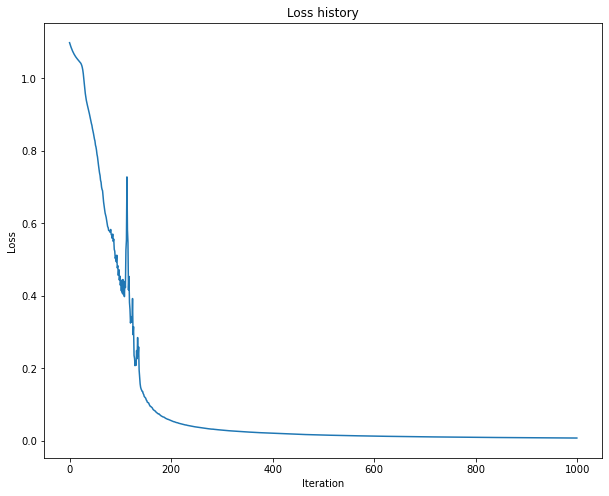

In [11]:
# Plot the training loss curve. The loss in the curve should be decreasing (20%)
plt.plot(epoch_loss)
plt.title("Loss history")
plt.xlabel("Iteration")
plt.ylabel("Loss")
